# Exercises-Week4

## Question-1

Assuming that $ A=\begin{bmatrix}
2 & 5 & 5  \\
1 & 7 & 5  \\
2 & -7 & 2  \\
\end{bmatrix}  $, $ B=\begin{bmatrix}
1 & 2 & -5  \\
3 & 4 & 3  \\
\end{bmatrix}  $, $ y=\begin{bmatrix}
5   \\
2   \\
8   \\
\end{bmatrix}  $ , $ z=\begin{bmatrix}
-15   \\
7   \\
-11   \\
\end{bmatrix}  $ \
calculate each of the following:

(1) $ BA $

In [ ]:
# Write down your code here.




Sample Answer

In [18]:
# Write down your code here.

A = np.array([[2,5,5],[1,7,5],[2,-7,2]])
B = np.array([[1,2,-5],[3,4,3]])
np.dot(B,A) 


array([[-6, 54,  5],
       [16, 22, 41]])

(2) $ AB^T $

In [ ]:
# Write down your code here.




Sample Answer

In [19]:
# Write down your code here.

A = np.array([[2,5,5],[1,7,5],[2,-7,2]])
B = np.array([[1,2,-5],[3,4,3]])
np.dot(A,B.T) 


array([[-13,  41],
       [-10,  46],
       [-22, -16]])

(3) $ Ay $

In [ ]:
# Write down your code here.




Sample Answer

In [40]:
# Write down your code here.

A = np.array([[2,5,5],[1,7,5],[2,-7,2]])
y = np.array([[5],[2],[8]])
np.dot(A,y) 

array([[60],
       [59],
       [12]])

(4) $ y^Tz $

In [41]:
# Write down your code here.




Sample Answer

In [42]:
# Write down your code here.

y = np.array([[5],[2],[8]])
y = np.array([[-15],[7],[-11]])
np.dot(A,y) 


array([[ -50],
       [ -21],
       [-101]])

## Question-2

Suppose we have the following system of equations and we'd like to solve for the values of x, y, and z:

6x + 2y + 3z = 31

3x + 5y – 2z = 20

8x + y - 4z = 30

In [43]:
# Write down your code here.





Sample Answer

In [44]:
import numpy as np

#define left-hand side of equation
left_side = np.array([[6, 2, 3], [3, 5, -2], [8, 1, -4]])

#define right-hand side of equation
right_side = np.array([31, 20, 30])

#solve for x, y, and z
np.linalg.inv(left_side).dot(right_side)

array([4., 2., 1.])

## Question-3

We will model the linear relationship between the stock excess returns and the market excess returns.

First, you need to load the data from the csv file ('data_exercises_week4.csv').

Secondly, model the linear relationship between 'Exret' and 'mktrf'.

$$ y=\beta x + \alpha $$

In this context, the dependent variable y is 'Exret' and the independent variable x is 'mktrf'.

Please follow what we' ve learned in class to figure out the coefficient estimates and plot them.


In [ ]:
# Write down your code here.





Sample Answer

In [29]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## To use statsmodels for linear regression
import statsmodels.formula.api as smf

In [36]:
# Read data from csv file
df=pd.read_csv('data_exercises_week4.csv')

In [37]:
### Fit a simple linear regression model to the data using statsmodels 

### Create an instance of the class OLS
slr_sm_model = smf.ols('exret ~ mktrf', data=df)

### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_fit = slr_sm_model.fit()

### Summarize the model

print(slr_sm_model_fit.summary()) 

param_slr = slr_sm_model_fit.params

                            OLS Regression Results                            
Dep. Variable:                  exret   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     191.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           9.98e-33
Time:                        00:23:33   Log-Likelihood:                 510.08
No. Observations:                 251   AIC:                            -1016.
Df Residuals:                     249   BIC:                            -1009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0028      0.002     -1.389      0.1

In [38]:
### Print the parameter estimates of the simple linear regression model

print("====================================================================")
print("The intercept in the statsmodels regression model is", \
      np.round(param_slr.Intercept, 4))
print("The slope in the statsmodels regression model is", \
      np.round(param_slr.mktrf, 4))
print("====================================================================")

The intercept in the statsmodels regression model is -0.0028
The slope in the statsmodels regression model is 1.7467


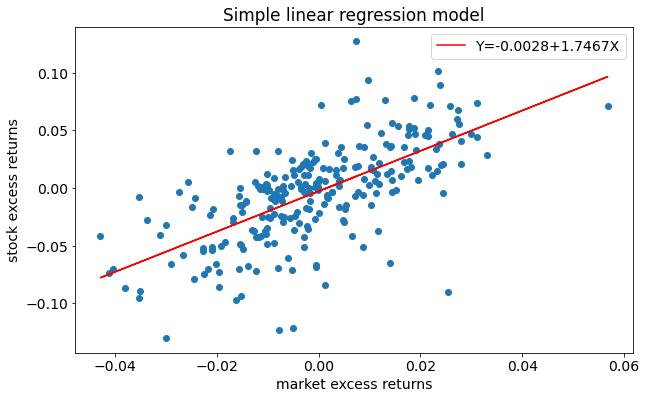

In [39]:
### Linear regression plot of X (spy) and Y (ko)
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("market excess returns")
plt.ylabel("stock excess returns")
plt.title("Simple linear regression model")
plt.scatter(df['mktrf'],df['exret'])
plt.plot(df['mktrf'], param_slr.Intercept+param_slr.mktrf * df['mktrf'],
         label='Y={:.4f}+{:.4f}X'.format(param_slr.Intercept, param_slr.mktrf), 
         color='red')
plt.legend()
plt.show()